## DATASET PREPARATION

Our intention is to classify the users' behaviours in 2 different classes: RELAXED and STRESSED.

In the analysis conducted before, we selected just a subset labels with respect to the numerous labels that we can found in the ExtraSensory dataset. The selected labels were splitted in 2 different macro-groups: RELAXED and STRESSED.

So first of all let's load the dataset, then let's remove unnecessary labels

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import gzip

datasetZipFolder = "/content/drive/MyDrive/IOTDA Project/dataset"

df_list=[]
for gzFile in os.listdir(datasetZipFolder):
  gzPath = datasetZipFolder+"//"+gzFile
  with gzip.open(gzPath) as f:
      df = pd.read_csv(f, header=0)
      df.insert(0,'uuid',gzFile[:-23])
      df_list.append(df)

df_dset = pd.concat(df_list, axis=0, ignore_index=True)
df_dset

,uuid,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,...,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601597,1.000371,0.007671,-0.016173,0.027860,0.998221,1.000739,1.003265,0.891038,6.684582,5.045157,0.000059,0.000231,0.000273,0.004710,0.430151,0.406215,0.253265,0.005318,0.000406,-1.000342,0.004052,0.003310,0.007697,-0.329743,0.382219,-0.121107,0.002536,0.002775,0.006024,0.010111,0.001327,0.001978,0.002784,0.689407,6.395739,4.578725,2.500818,3.515642,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601657,1.000243,0.003782,-0.002713,0.007046,0.998463,1.000373,1.002088,1.647929,6.684605,5.044516,0.000063,0.000140,0.000142,0.003209,0.429944,0.173521,0.234487,0.006822,0.000355,-1.000211,0.002911,0.002960,0.003792,0.202860,0.335481,0.105470,0.002338,0.001546,0.002007,0.002750,0.001344,0.001968,0.002770,2.081808,6.505969,4.653110,2.209467,2.779620,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601717,1.000811,0.002082,-0.001922,0.003575,0.999653,1.000928,1.002032,1.960286,6.684610,5.043892,0.000029,0.000084,0.000233,0.001885,0.429754,0.115731,0.163364,0.003077,-0.000170,-1.000802,0.002262,0.001760,0.002086,0.111225,0.488020,0.154312,0.002432,0.009142,0.027166,0.047330,0.001305,0.001823,0.002545,0.028810,6.016422,3.823204,3.596534,4.966467,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601777,1.001245,0.004715,-0.002895,0.008881,0.999188,1.001425,1.003500,1.614524,6.684601,5.043505,0.000238,0.000878,0.000890,0.013964,0.429890,1.474943,0.121753,0.006925,0.002558,-1.001208,0.003094,0.003091,0.004724,-0.107052,0.351430,-0.05425

In [3]:
def get_label_pretty_name(label):
    if label == 'FIX_walking':
        return 'Walking';
    if label == 'FIX_running':
        return 'Running';
    if label == 'LOC_main_workplace':
        return 'At main workplace';
    if label == 'OR_indoors':
        return 'Indoors';
    if label == 'OR_outside':
        return 'Outside';
    if label == 'LOC_home':
        return 'At home';
    if label == 'FIX_restaurant':
        return 'At a restaurant';
    if label == 'OR_exercise':
        return 'Exercise';
    if label == 'LOC_beach':
        return 'At the beach';
    if label == 'OR_standing':
        return 'Standing';
    if label == 'WATCHING_TV':
        return 'Watching TV'
    
    if label.endswith('_'):
        label = label[:-1] + ')';
        pass;
    
    label = label.replace('__',' (').replace('_',' ');
    label = label[0] + label[1:].lower();
    label = label.replace('i m','I\'m');
    return label;

In [4]:
relaxed_labels = ['Lying down', 'Sleeping', 'With friends', 'Bicycling', 'Exercise', 'Grooming', 'Bathing - shower', 'Shopping', 'Running', 'Outside', 'At a restaurant', 'Strolling', 'At a party', 'At the beach', 'At the gym']

In [5]:
stressed_labels = ['Computer work', 'Lab work', 'In a meeting', 'In class', 'At main workplace', 'On a bus', 'Drive - I\'m the driver', 'Watching TV', 'Surfing the internet']

In [6]:
user_data = []

# for label in static_labels:
#   user_data += df_dset.loc[df_dset["label:"+label]==1]

for col in df_dset.columns:
  if(col.startswith("label:") ):
    temp_label = col.replace("label:", "")
    # print(temp_label)
    temp_label = get_label_pretty_name(temp_label)       
    # print(temp_label)
    if(temp_label in relaxed_labels or temp_label in stressed_labels):
      # print(temp_label)
      # print(col, temp_label)
      df_dset = df_dset.rename(columns = {col: temp_label})
    else:
      # print(temp_label)
      df_dset = df_dset.drop(columns=[col])

In [7]:
df_dset

,uuid,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,...,lf_measurements:pressure,lf_measurements:proximity_cm,lf_measurements:proximity,lf_measurements:relative_humidity,lf_measurements:battery_level,lf_measurements:screen_brightness,lf_measurements:temperature_ambient,discrete:time_of_day:between0and6,discrete:time_of_day:between3and9,discrete:time_of_day:between6and12,discrete:time_of_day:between9and15,discrete:time_of_day:between12and18,discrete:time_of_day:between15and21,discrete:time_of_day:between18and24,discrete:time_of_day:between21and3,Lying down,Running,Bicycling,Sleeping,Lab work,In class,In a meeting,At main workplace,Outside,On a bus,Drive - I'm the driver,At a restaurant,Exercise,Shopping,Strolling,Bathing - shower,Watching TV,Surfing the internet,At a party,At the beach,Computer work,Grooming,At the gym,With friends,label_source
0,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601597,1.000371,0.007671,-0.016173,0.027860,0.998221,1.000739,1.003265,0.891038,6.684582,5.045157,0.000059,0.000231,0.000273,0.004710,0.430151,0.406215,0.253265,0.005318,0.000406,-1.000342,0.004052,0.003310,0.007697,-0.329743,0.382219,-0.121107,0.002536,0.002775,0.006024,0.010111,0.001327,0.001978,0.002784,0.689407,6.395739,4.578725,2.500818,3.515642,...,NaN,NaN,0.0,NaN,0.88,0.427701,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601657,1.000243,0.003782,-0.002713,0.007046,0.998463,1.000373,1.002088,1.647929,6.684605,5.044516,0.000063,0.000140,0.000142,0.003209,0.429944,0.173521,0.234487,0.006822,0.000355,-1.000211,0.002911,0.002960,0.003792,0.202860,0.335481,0.105470,0.002338,0.001546,0.002007,0.002750,0.001344,0.001968,0.002770,2.081808,6.505969,4.653110,2.209467,2.779620,...,NaN,NaN,0.0,NaN,0.88,0.427701,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601717,1.000811,0.002082,-0.001922,0.003575,0.999653,1.000928,1.002032,1.960286,6.684610,5.043892,0.000029,0.000084,0.000233,0.001885,0.429754,0.115731,0.163364,0.003077,-0.000170,-1.000802,0.002262,0.001760,0.002086,0.111225,0.488020,0.154312,0.002432,0.009142,0.027166,0.047330,0.001305,0.001823,0.002545,0.028810,6.016422,3.823204,3.596534,4.966467,...,NaN,NaN,0.0,NaN,0.89,0.427701,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601777,1.001245,0.004715,-0.002895,0.008881,0.999188,1.001425,1.003500,1.614524,6.684601,5.043505,0.000238,0.000878,0.000890,0.013964,0.429890,1.474943,0.121753,0.006

Now, let's define a method that allow to select just a subset of features that we want to include in the final dataset that we will use for the classification.

In [8]:
for col in df_dset.columns:
  print(col)

uuid
timestamp
raw_acc:magnitude_stats:mean
raw_acc:magnitude_stats:std
raw_acc:magnitude_stats:moment3
raw_acc:magnitude_stats:moment4
raw_acc:magnitude_stats:percentile25
raw_acc:magnitude_stats:percentile50
raw_acc:magnitude_stats:percentile75
raw_acc:magnitude_stats:value_entropy
raw_acc:magnitude_stats:time_entropy
raw_acc:magnitude_spectrum:log_energy_band0
raw_acc:magnitude_spectrum:log_energy_band1
raw_acc:magnitude_spectrum:log_energy_band2
raw_acc:magnitude_spectrum:log_energy_band3
raw_acc:magnitude_spectrum:log_energy_band4
raw_acc:magnitude_spectrum:spectral_entropy
raw_acc:magnitude_autocorrelation:period
raw_acc:magnitude_autocorrelation:normalized_ac
raw_acc:3d:mean_x
raw_acc:3d:mean_y
raw_acc:3d:mean_z
raw_acc:3d:std_x
raw_acc:3d:std_y
raw_acc:3d:std_z
raw_acc:3d:ro_xy
raw_acc:3d:ro_xz
raw_acc:3d:ro_yz
proc_gyro:magnitude_stats:mean
proc_gyro:magnitude_stats:std
proc_gyro:magnitude_stats:moment3
proc_gyro:magnitude_stats:moment4
proc_gyro:magnitude_stats:percentile25
p

In [9]:
features_to_consider = ['location', 'audio', 'lf_measurements']

final_feature_names = []
columns_to_delete = []
to_delete = True

for col in df_dset.columns:
  if(col == 'Lying down'):
    #it's the first label column: starting from here, all columns must not be discarded
    break;
  to_delete = True
  for feature in features_to_consider:
    # print("CHECK",col, feature)
    if (col.startswith(feature) or col == 'uuid' or col == 'timestamp'):
      # print("MATCH", col)
      to_delete = False
      final_feature_names.append(col)
      break;

  if(to_delete):
    # print("DELETE", col)
    columns_to_delete.append(col)

In [10]:
final_dataset = df_dset.drop(columns= columns_to_delete)
final_dataset

,uuid,timestamp,location:num_valid_updates,location:log_latitude_range,location:log_longitude_range,location:min_altitude,location:max_altitude,location:min_speed,location:max_speed,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,audio_properties:max_abs_value,audio_properties:normalization_multiplier,lf_measurements:light,lf_measurements:pressure,lf_measurements:proximity_cm,lf_measurements:proximity,lf_measurements:relative_humidity,lf_measurements:battery_level,lf_measurements:screen_brightness,lf_measurements:temperature_ambient,Lying down,Running,Bicycling,Sleeping,Lab work,In class,In a meeting,At main workplace,Outside,On a bus,Drive - I'm the driver,At a restaurant,Exercise,Shopping,Strolling,Bathing - shower,Watching TV,Surfing the internet,At a party,At the beach,Computer work,Grooming,At the gym,With friends,label_source
0,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601597,0.0,NaN,NaN,112.630081,112.630081,NaN,NaN,NaN,22.971230,0.000000,-6.907755,0.000918,0.000945,-0.001836,-0.001890,NaN,NaN,-9.503045,2.046711,-0.825009,1.380326,-0.223449,-0.264700,-0.602001,-0.193844,-0.191483,-0.165720,-0.117220,0.232021,-0.444167,2.264301,1.072673,1.273191,0.837097,0.511439,0.582278,0.447270,0.429604,0.432580,0.390988,0.375133,0.364036,0.415471,-1.165319,1.165354,NaN,NaN,NaN,0.0,NaN,0.88,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601657,2.0,0.000079,0.000112,109.636948,112.630081,NaN,NaN,65.0,19.070132,0.013724,-4.288634,0.000790,0.000906,-0.001577,-0.001930,0.000463,0.000565,-11.141426,2.148693,-0.753735,1.203111,-0.268566,-0.056189,-0.616975,-0.250412,-0.317040,-0.266669,-0.056653,0.308500,-0.438384,2.170889,1.230650,1.213305,0.830664,0.481447,0.532551,0.510097,0.428541,0.401233,0.415457,0.380293,0.296594,0.494291,-0.907517,0.907546,NaN,NaN,NaN,0.0,NaN,0.88,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601717,7.0,0.051085,0.042162,107.505554,108.744263,NaN,NaN,65.0,10.000000,6.027438,1.796322,0.000016,0.000015,0.000031,-0.000022,0.000077,0.000093,-7.418426,2.016611,-1.061945,1.195417,-0.593168,0.041554,-0.588281,-0.620592,-0.289123,-0.104321,0.083421,0.198781,-0.299491,2.406004,1.396577,1.281903,0.800262,0.490133,0.495246,0.540785,0.569112,0.463722,0.515975,0.464771,0.436589,0.527716,-1.418762,1.418805,NaN,NaN,NaN,0.0,NaN,0.89,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601777,3.0,0.014225,0.020967,107.499290,107.505554,NaN,NaN,65.0,10.000000,2.519672,0.924129,0.000624,0.000792,0.000014,-0.000021,0.007952,0.010030,-5.141344,1.495251,-0.417113,1.300878,-0.222537,-0.284748,-0.615113,-0.121709,-0.055334,-0.173618,0.002491,0.199237,-0.542210,2.157554,1.223649,1.183698,0.822270,0.393164,0.523738,0.436399,0.387059,0.366810,0.445737,0.350695,0.345911,0.497549,-1.920135,1.920205,NaN,NaN,NaN,0.0,NaN,0.89,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

This is the final dataset that we are going to consider for our classification: now we have to clean it because there are some missing values

In [11]:
print("Number of NaN values in the dataset: ",final_dataset.isna().sum().sum())
noNaN_each_row = (final_dataset.count())
total_noNaN = 0
for value in noNaN_each_row:
  total_noNaN+=value

print("Number of no-NaN values in the dataset: ",total_noNaN)

Number of NaN values in the dataset:  8911025
Number of no-NaN values in the dataset:  21276655


Since there are many missing values, we can start cleaning the dataset removing all those columns where the number of no-NaN values is less than 10% of the rows.

In [12]:
n_values_each_column = final_dataset.count(axis = 0)
n_values_each_column

uuid                            377346
timestamp                       377346
location:num_valid_updates      333934
location:log_latitude_range     301999
location:log_longitude_range    301999
                                 ...  
Computer work                   237559
Grooming                        198800
At the gym                       44393
With friends                    165414
label_source                    377346
Length: 80, dtype: int64

Let's find the columns' index that we have to delete

In [13]:
index_toDel = []

for column_index,n_values in enumerate(n_values_each_column):
  if((float(n_values)/final_dataset.shape[0]*100)<10):
    print(float(n_values)/final_dataset.shape[0]*100)
    index_toDel.append(column_index)

6.874062531469792
7.009482013854658


In [14]:
feature_to_del = []
print(index_toDel)
for i in index_toDel:
  feature_to_del.append(final_dataset.columns[i])

final_dataset = final_dataset.drop(feature_to_del, axis = 1)
final_dataset

[51, 54]


,uuid,timestamp,location:num_valid_updates,location:log_latitude_range,location:log_longitude_range,location:min_altitude,location:max_altitude,location:min_speed,location:max_speed,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,audio_properties:max_abs_value,audio_properties:normalization_multiplier,lf_measurements:light,lf_measurements:pressure,lf_measurements:proximity_cm,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,Lying down,Running,Bicycling,Sleeping,Lab work,In class,In a meeting,At main workplace,Outside,On a bus,Drive - I'm the driver,At a restaurant,Exercise,Shopping,Strolling,Bathing - shower,Watching TV,Surfing the internet,At a party,At the beach,Computer work,Grooming,At the gym,With friends,label_source
0,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601597,0.0,NaN,NaN,112.630081,112.630081,NaN,NaN,NaN,22.971230,0.000000,-6.907755,0.000918,0.000945,-0.001836,-0.001890,NaN,NaN,-9.503045,2.046711,-0.825009,1.380326,-0.223449,-0.264700,-0.602001,-0.193844,-0.191483,-0.165720,-0.117220,0.232021,-0.444167,2.264301,1.072673,1.273191,0.837097,0.511439,0.582278,0.447270,0.429604,0.432580,0.390988,0.375133,0.364036,0.415471,-1.165319,1.165354,NaN,NaN,NaN,0.0,0.88,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601657,2.0,0.000079,0.000112,109.636948,112.630081,NaN,NaN,65.0,19.070132,0.013724,-4.288634,0.000790,0.000906,-0.001577,-0.001930,0.000463,0.000565,-11.141426,2.148693,-0.753735,1.203111,-0.268566,-0.056189,-0.616975,-0.250412,-0.317040,-0.266669,-0.056653,0.308500,-0.438384,2.170889,1.230650,1.213305,0.830664,0.481447,0.532551,0.510097,0.428541,0.401233,0.415457,0.380293,0.296594,0.494291,-0.907517,0.907546,NaN,NaN,NaN,0.0,0.88,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601717,7.0,0.051085,0.042162,107.505554,108.744263,NaN,NaN,65.0,10.000000,6.027438,1.796322,0.000016,0.000015,0.000031,-0.000022,0.000077,0.000093,-7.418426,2.016611,-1.061945,1.195417,-0.593168,0.041554,-0.588281,-0.620592,-0.289123,-0.104321,0.083421,0.198781,-0.299491,2.406004,1.396577,1.281903,0.800262,0.490133,0.495246,0.540785,0.569112,0.463722,0.515975,0.464771,0.436589,0.527716,-1.418762,1.418805,NaN,NaN,NaN,0.0,0.89,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601777,3.0,0.014225,0.020967,107.499290,107.505554,NaN,NaN,65.0,10.000000,2.519672,0.924129,0.000624,0.000792,0.000014,-0.000021,0.007952,0.010030,-5.141344,1.495251,-0.417113,1.300878,-0.222537,-0.284748,-0.615113,-0.121709,-0.055334,-0.173618,0.002491,0.199237,-0.542210,2.157554,1.223649,1.183698,0.822270,0.393164,0.523738,0.436399,0.387059,0.366810,0.445737,0.350695,0.345911,0.497549,-1.920135,1.920205,NaN,NaN,NaN,0.0,0.89,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,0A986513-7828-4D53-AA1F-E02D6DF9561B,144960

Let's see how many NaN values are still in the dataset

In [15]:
print("Number of NaN values in the dataset: ",final_dataset.isna().sum().sum())
noNaN_each_row = (final_dataset.count())
total_noNaN = 0
for value in noNaN_each_row:
  total_noNaN+=value

print("Number of no-NaN values in the dataset: ",total_noNaN)

Number of NaN values in the dataset:  8208722
Number of no-NaN values in the dataset:  21224266


Since there are still many nan values, let's remove columns with more than 50% of values that are NaN

In [16]:
n_values_each_column = final_dataset.count(axis = 0)
n_values_each_column

uuid                            377346
timestamp                       377346
location:num_valid_updates      333934
location:log_latitude_range     301999
location:log_longitude_range    301999
                                 ...  
Computer work                   237559
Grooming                        198800
At the gym                       44393
With friends                    165414
label_source                    377346
Length: 78, dtype: int64

In [17]:
index_toDel = []

for column_index,n_values in enumerate(n_values_each_column):
  if((float(n_values)/final_dataset.shape[0]*100)<50):
    # print(final_dataset.columns[column_index], float(n_values)/final_dataset.shape[0]*100)
    if(not(final_dataset.columns[column_index] in relaxed_labels or final_dataset.columns[column_index] in stressed_labels)): #because we don't want to delete also label columns
      index_toDel.append(column_index)

In [18]:
feature_to_del = []
print(index_toDel)
for i in index_toDel:
  feature_to_del.append(final_dataset.columns[i])

final_dataset = final_dataset.drop(feature_to_del, axis = 1)
final_dataset

[7, 8, 47, 48, 49]


,uuid,timestamp,location:num_valid_updates,location:log_latitude_range,location:log_longitude_range,location:min_altitude,location:max_altitude,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,audio_properties:max_abs_value,audio_properties:normalization_multiplier,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,Lying down,Running,Bicycling,Sleeping,Lab work,In class,In a meeting,At main workplace,Outside,On a bus,Drive - I'm the driver,At a restaurant,Exercise,Shopping,Strolling,Bathing - shower,Watching TV,Surfing the internet,At a party,At the beach,Computer work,Grooming,At the gym,With friends,label_source
0,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601597,0.0,NaN,NaN,112.630081,112.630081,NaN,22.971230,0.000000,-6.907755,0.000918,0.000945,-0.001836,-0.001890,NaN,NaN,-9.503045,2.046711,-0.825009,1.380326,-0.223449,-0.264700,-0.602001,-0.193844,-0.191483,-0.165720,-0.117220,0.232021,-0.444167,2.264301,1.072673,1.273191,0.837097,0.511439,0.582278,0.447270,0.429604,0.432580,0.390988,0.375133,0.364036,0.415471,-1.165319,1.165354,0.0,0.88,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601657,2.0,0.000079,0.000112,109.636948,112.630081,65.0,19.070132,0.013724,-4.288634,0.000790,0.000906,-0.001577,-0.001930,0.000463,0.000565,-11.141426,2.148693,-0.753735,1.203111,-0.268566,-0.056189,-0.616975,-0.250412,-0.317040,-0.266669,-0.056653,0.308500,-0.438384,2.170889,1.230650,1.213305,0.830664,0.481447,0.532551,0.510097,0.428541,0.401233,0.415457,0.380293,0.296594,0.494291,-0.907517,0.907546,0.0,0.88,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601717,7.0,0.051085,0.042162,107.505554,108.744263,65.0,10.000000,6.027438,1.796322,0.000016,0.000015,0.000031,-0.000022,0.000077,0.000093,-7.418426,2.016611,-1.061945,1.195417,-0.593168,0.041554,-0.588281,-0.620592,-0.289123,-0.104321,0.083421,0.198781,-0.299491,2.406004,1.396577,1.281903,0.800262,0.490133,0.495246,0.540785,0.569112,0.463722,0.515975,0.464771,0.436589,0.527716,-1.418762,1.418805,0.0,0.89,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601777,3.0,0.014225,0.020967,107.499290,107.505554,65.0,10.000000,2.519672,0.924129,0.000624,0.000792,0.000014,-0.000021,0.007952,0.010030,-5.141344,1.495251,-0.417113,1.300878,-0.222537,-0.284748,-0.615113,-0.121709,-0.055334,-0.173618,0.002491,0.199237,-0.542210,2.157554,1.223649,1.183698,0.822270,0.393164,0.523738,0.436399,0.387059,0.366810,0.445737,0.350695,0.345911,0.497549,-1.920135,1.920205,0.0,0.89,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601855,8.0,0.016058,0.011644,107.327866,107.444542,65.0,10.000000,2.046826,0.716290,0.000006,0.000005,-0.000006,-0.000001,NaN,NaN,-13.549097,1.401999,-0.704891,1.090211,-0.355878,-0.276246,-0.4749

In [19]:
print("Number of NaN values in the dataset: ",final_dataset.isna().sum().sum())
noNaN_each_row = (final_dataset.count())
total_noNaN = 0
for value in noNaN_each_row:
  total_noNaN+=value

print("Number of no-NaN values in the dataset: ",total_noNaN)

Number of NaN values in the dataset:  6933897
Number of no-NaN values in the dataset:  20612361


There are still many nan values. But we can notice that many NaN values are in the column labels (Lying down, Sitting ,....): for example there are rows with Sitting = 1.0, and all the other labels NaN. 

We simply have to substitute all these label columns with a single column 'CLASS' that is 1 for relaxed labels(those rows where Sleeping, Lying down, With friends or other relaxed labels = 1), 0 for stressed ones(those rows were Computer work, In a meeting, Lab work or other stressed labels = 1).

In [20]:
final_dataset

,uuid,timestamp,location:num_valid_updates,location:log_latitude_range,location:log_longitude_range,location:min_altitude,location:max_altitude,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,audio_properties:max_abs_value,audio_properties:normalization_multiplier,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,Lying down,Running,Bicycling,Sleeping,Lab work,In class,In a meeting,At main workplace,Outside,On a bus,Drive - I'm the driver,At a restaurant,Exercise,Shopping,Strolling,Bathing - shower,Watching TV,Surfing the internet,At a party,At the beach,Computer work,Grooming,At the gym,With friends,label_source
0,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601597,0.0,NaN,NaN,112.630081,112.630081,NaN,22.971230,0.000000,-6.907755,0.000918,0.000945,-0.001836,-0.001890,NaN,NaN,-9.503045,2.046711,-0.825009,1.380326,-0.223449,-0.264700,-0.602001,-0.193844,-0.191483,-0.165720,-0.117220,0.232021,-0.444167,2.264301,1.072673,1.273191,0.837097,0.511439,0.582278,0.447270,0.429604,0.432580,0.390988,0.375133,0.364036,0.415471,-1.165319,1.165354,0.0,0.88,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601657,2.0,0.000079,0.000112,109.636948,112.630081,65.0,19.070132,0.013724,-4.288634,0.000790,0.000906,-0.001577,-0.001930,0.000463,0.000565,-11.141426,2.148693,-0.753735,1.203111,-0.268566,-0.056189,-0.616975,-0.250412,-0.317040,-0.266669,-0.056653,0.308500,-0.438384,2.170889,1.230650,1.213305,0.830664,0.481447,0.532551,0.510097,0.428541,0.401233,0.415457,0.380293,0.296594,0.494291,-0.907517,0.907546,0.0,0.88,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601717,7.0,0.051085,0.042162,107.505554,108.744263,65.0,10.000000,6.027438,1.796322,0.000016,0.000015,0.000031,-0.000022,0.000077,0.000093,-7.418426,2.016611,-1.061945,1.195417,-0.593168,0.041554,-0.588281,-0.620592,-0.289123,-0.104321,0.083421,0.198781,-0.299491,2.406004,1.396577,1.281903,0.800262,0.490133,0.495246,0.540785,0.569112,0.463722,0.515975,0.464771,0.436589,0.527716,-1.418762,1.418805,0.0,0.89,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601777,3.0,0.014225,0.020967,107.499290,107.505554,65.0,10.000000,2.519672,0.924129,0.000624,0.000792,0.000014,-0.000021,0.007952,0.010030,-5.141344,1.495251,-0.417113,1.300878,-0.222537,-0.284748,-0.615113,-0.121709,-0.055334,-0.173618,0.002491,0.199237,-0.542210,2.157554,1.223649,1.183698,0.822270,0.393164,0.523738,0.436399,0.387059,0.366810,0.445737,0.350695,0.345911,0.497549,-1.920135,1.920205,0.0,0.89,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601855,8.0,0.016058,0.011644,107.327866,107.444542,65.0,10.000000,2.046826,0.716290,0.000006,0.000005,-0.000006,-0.000001,NaN,NaN,-13.549097,1.401999,-0.704891,1.090211,-0.355878,-0.276246,-0.4749

Let's set CLASS= 1 for relaxed, CLASS=0 for stressed

In [21]:
final_dataset['CLASS'] = 0 #default

for index, row in final_dataset.iterrows():
  for label in relaxed_labels:
    if(row[label]==1.0):
      final_dataset.at[index, 'CLASS'] = 1


final_dataset


,uuid,timestamp,location:num_valid_updates,location:log_latitude_range,location:log_longitude_range,location:min_altitude,location:max_altitude,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,audio_properties:max_abs_value,audio_properties:normalization_multiplier,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,Lying down,Running,Bicycling,Sleeping,Lab work,In class,In a meeting,At main workplace,Outside,On a bus,Drive - I'm the driver,At a restaurant,Exercise,Shopping,Strolling,Bathing - shower,Watching TV,Surfing the internet,At a party,At the beach,Computer work,Grooming,At the gym,With friends,label_source,CLASS
0,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601597,0.0,NaN,NaN,112.630081,112.630081,NaN,22.971230,0.000000,-6.907755,0.000918,0.000945,-0.001836,-0.001890,NaN,NaN,-9.503045,2.046711,-0.825009,1.380326,-0.223449,-0.264700,-0.602001,-0.193844,-0.191483,-0.165720,-0.117220,0.232021,-0.444167,2.264301,1.072673,1.273191,0.837097,0.511439,0.582278,0.447270,0.429604,0.432580,0.390988,0.375133,0.364036,0.415471,-1.165319,1.165354,0.0,0.88,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0
1,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601657,2.0,0.000079,0.000112,109.636948,112.630081,65.0,19.070132,0.013724,-4.288634,0.000790,0.000906,-0.001577,-0.001930,0.000463,0.000565,-11.141426,2.148693,-0.753735,1.203111,-0.268566,-0.056189,-0.616975,-0.250412,-0.317040,-0.266669,-0.056653,0.308500,-0.438384,2.170889,1.230650,1.213305,0.830664,0.481447,0.532551,0.510097,0.428541,0.401233,0.415457,0.380293,0.296594,0.494291,-0.907517,0.907546,0.0,0.88,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0
2,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601717,7.0,0.051085,0.042162,107.505554,108.744263,65.0,10.000000,6.027438,1.796322,0.000016,0.000015,0.000031,-0.000022,0.000077,0.000093,-7.418426,2.016611,-1.061945,1.195417,-0.593168,0.041554,-0.588281,-0.620592,-0.289123,-0.104321,0.083421,0.198781,-0.299491,2.406004,1.396577,1.281903,0.800262,0.490133,0.495246,0.540785,0.569112,0.463722,0.515975,0.464771,0.436589,0.527716,-1.418762,1.418805,0.0,0.89,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0
3,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601777,3.0,0.014225,0.020967,107.499290,107.505554,65.0,10.000000,2.519672,0.924129,0.000624,0.000792,0.000014,-0.000021,0.007952,0.010030,-5.141344,1.495251,-0.417113,1.300878,-0.222537,-0.284748,-0.615113,-0.121709,-0.055334,-0.173618,0.002491,0.199237,-0.542210,2.157554,1.223649,1.183698,0.822270,0.393164,0.523738,0.436399,0.387059,0.366810,0.445737,0.350695,0.345911,0.497549,-1.920135,1.920205,0.0,0.89,0.427701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0
4,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601855,8.0,0.016058,0.011644,107.327866,107.444542,65.0,10.000000,2.046826,0.716290,0.000006,0.000005,-0.000006,-0.000001,NaN,NaN,-13.549097,1.401999,-0.704891,1.090211,-0.355878,-0.

Now let's see if there are rows with all NaN values in labels' columns: this means that if there are rows with Sleeping = NaN, Lying down = NaN, With friends = NaN ... and all the other labels = NaN, we have to delete these rows.

In [22]:
import math

row_with_allNan = True
rowIndex_toDel = []

for index, row in final_dataset.iterrows():
  row_with_allNan = True
  # print("Riga ",index)
  for i in range (48, len(row)-2):
    # print(final_dataset.columns[i], row[i])
    if(math.isnan(row[i])):
      ;
    else:
      row_with_allNan = False
      # print("No-nan value: cambia riga")
      break
  if(row_with_allNan):
    rowIndex_toDel.append(index)

In [23]:
final_dataset_copy = final_dataset.copy()

final_dataset_copy.drop(labels = rowIndex_toDel, axis = 0, inplace=True)

final_dataset_copy

,uuid,timestamp,location:num_valid_updates,location:log_latitude_range,location:log_longitude_range,location:min_altitude,location:max_altitude,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,audio_properties:max_abs_value,audio_properties:normalization_multiplier,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,Lying down,Running,Bicycling,Sleeping,Lab work,In class,In a meeting,At main workplace,Outside,On a bus,Drive - I'm the driver,At a restaurant,Exercise,Shopping,Strolling,Bathing - shower,Watching TV,Surfing the internet,At a party,At the beach,Computer work,Grooming,At the gym,With friends,label_source,CLASS
4,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601855,8.0,0.016058,0.011644,107.327866,107.444542,65.0,10.000000,2.046826,0.716290,0.000006,0.000005,-0.000006,-0.000001,NaN,NaN,-13.549097,1.401999,-0.704891,1.090211,-0.355878,-0.276246,-0.474989,-0.164379,-0.126404,-0.155411,-0.429673,-0.010401,-0.395080,3.794870,1.717074,1.386633,0.919153,0.781238,0.677766,0.636156,0.619780,0.463478,0.584551,0.416353,0.396484,0.333246,-0.010833,0.010853,0.0,0.90,0.427701,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,0
5,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601918,5.0,0.006312,0.009386,107.327866,107.838150,65.0,10.000000,1.090911,0.087013,0.000610,0.000775,-0.000006,0.000009,0.008010,0.010214,-14.858507,2.634964,-0.333264,1.044149,-0.278071,-0.106829,-0.607542,-0.405368,-0.254425,-0.004343,-0.494752,-0.118831,-0.157087,3.105783,2.000479,1.225756,0.961195,0.549289,0.689458,0.660151,0.500852,0.503734,0.502756,0.457566,0.367323,0.381989,-0.007966,0.007986,0.0,0.90,0.427701,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,0
6,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601975,3.0,0.023422,0.001308,107.486160,107.545700,65.0,10.000000,2.636773,0.969556,0.000636,0.000810,0.000024,-0.000001,0.010493,0.013289,-8.121591,2.289356,-0.082597,1.139277,-0.713073,-0.431688,-0.873148,-0.217033,-0.024974,-0.035368,-0.553310,-0.068898,-0.368726,2.462395,1.856324,1.532950,1.090916,0.679544,0.804691,0.695999,0.642575,0.628645,0.503185,0.389384,0.485069,0.397792,-1.035736,1.035767,0.0,0.90,0.427701,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,0
7,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449602035,3.0,0.006010,0.013847,106.346588,107.545700,65.0,10.823976,1.452658,0.373395,0.000619,0.000800,0.000006,-0.000014,0.004647,0.005985,-8.305555,2.563314,-0.373057,1.082110,-0.538777,-0.258276,-0.825694,-0.199237,-0.060454,-0.197026,-0.248424,0.020790,-0.816249,2.877096,1.742282,1.296602,0.946116,0.546904,0.748546,0.694885,0.576296,0.560920,0.487659,0.457883,0.490033,0.528575,-1.110900,1.110933,0.0,0.90,0.427701,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,0
8,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449602095,5.0,0.080401,0.030949,105.760384,107.071968,65.0,10.000000,9.310615,2.231155,0.000591,0.000770,-0.000052,-0.000030,0.008452,0.011012,-11.488435,2.294910,-0.751216,1

After deleting those rows, now we can remove all the labels' columns since we successfully added the CLASS column that has been constructed as explained before.

In [24]:
print(final_dataset_copy.columns[48:-1])

final_dataset_copy.drop(labels = final_dataset_copy.columns[48:-1], axis = 1, inplace= True)

final_dataset_copy

Index(['Lying down', 'Running', 'Bicycling', 'Sleeping', 'Lab work',
       'In class', 'In a meeting', 'At main workplace', 'Outside', 'On a bus',
       'Drive - I'm the driver', 'At a restaurant', 'Exercise', 'Shopping',
       'Strolling', 'Bathing - shower', 'Watching TV', 'Surfing the internet',
       'At a party', 'At the beach', 'Computer work', 'Grooming', 'At the gym',
       'With friends', 'label_source'],
      dtype='object')


,uuid,timestamp,location:num_valid_updates,location:log_latitude_range,location:log_longitude_range,location:min_altitude,location:max_altitude,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,audio_properties:max_abs_value,audio_properties:normalization_multiplier,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,CLASS
4,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601855,8.0,0.016058,0.011644,107.327866,107.444542,65.0,10.000000,2.046826,0.716290,0.000006,0.000005,-0.000006,-0.000001,NaN,NaN,-13.549097,1.401999,-0.704891,1.090211,-0.355878,-0.276246,-0.474989,-0.164379,-0.126404,-0.155411,-0.429673,-0.010401,-0.395080,3.794870,1.717074,1.386633,0.919153,0.781238,0.677766,0.636156,0.619780,0.463478,0.584551,0.416353,0.396484,0.333246,-0.010833,0.010853,0.0,0.90,0.427701,0
5,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601918,5.0,0.006312,0.009386,107.327866,107.838150,65.0,10.000000,1.090911,0.087013,0.000610,0.000775,-0.000006,0.000009,0.008010,0.010214,-14.858507,2.634964,-0.333264,1.044149,-0.278071,-0.106829,-0.607542,-0.405368,-0.254425,-0.004343,-0.494752,-0.118831,-0.157087,3.105783,2.000479,1.225756,0.961195,0.549289,0.689458,0.660151,0.500852,0.503734,0.502756,0.457566,0.367323,0.381989,-0.007966,0.007986,0.0,0.90,0.427701,0
6,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449601975,3.0,0.023422,0.001308,107.486160,107.545700,65.0,10.000000,2.636773,0.969556,0.000636,0.000810,0.000024,-0.000001,0.010493,0.013289,-8.121591,2.289356,-0.082597,1.139277,-0.713073,-0.431688,-0.873148,-0.217033,-0.024974,-0.035368,-0.553310,-0.068898,-0.368726,2.462395,1.856324,1.532950,1.090916,0.679544,0.804691,0.695999,0.642575,0.628645,0.503185,0.389384,0.485069,0.397792,-1.035736,1.035767,0.0,0.90,0.427701,0
7,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449602035,3.0,0.006010,0.013847,106.346588,107.545700,65.0,10.823976,1.452658,0.373395,0.000619,0.000800,0.000006,-0.000014,0.004647,0.005985,-8.305555,2.563314,-0.373057,1.082110,-0.538777,-0.258276,-0.825694,-0.199237,-0.060454,-0.197026,-0.248424,0.020790,-0.816249,2.877096,1.742282,1.296602,0.946116,0.546904,0.748546,0.694885,0.576296,0.560920,0.487659,0.457883,0.490033,0.528575,-1.110900,1.110933,0.0,0.90,0.427701,0
8,0A986513-7828-4D53-AA1F-E02D6DF9561B,1449602095,5.0,0.080401,0.030949,105.760384,107.071968,65.0,10.000000,9.310615,2.231155,0.000591,0.000770,-0.000052,-0.000030,0.008452,0.011012,-11.488435,2.294910,-0.751216,1.034768,-0.749439,-0.284983,-0.692220,-0.190684,-0.007380,-0.255322,-0.402399,0.152235,-0.519166,3.847504,1.736531,1.573501,1.018043,0.896453,0.756097,0.764625,0.704467,0.565882,0.476044,0.471686,0.426533,0.538912,-0.339769,0.339790,0.0,0.90,0.461277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377321,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,1444233568,29.0,0.307076,0.489323,113.598225,119.839127,5.0,3.000000,65.287252,4.178797,0.000059,0.000196,0.000016,0.000935,0.000300,0.000525,-7.392128,1.603140,-1.813540,-0.402678,-1.860173,-0.456350

Now let's count all the NaN and non-Nan values in the overall dataset

In [25]:
print("Number of NaN values in the dataset: ",final_dataset_copy.isna().sum().sum())
noNaN_each_row = (final_dataset_copy.count())
total_noNaN = 0
for value in noNaN_each_row:
  total_noNaN+=value

print("Number of no-NaN values in the dataset: ",total_noNaN)

Number of NaN values in the dataset:  1644126
Number of no-NaN values in the dataset:  15312520


Let's build a dataset without uuid and timestamp columns, without substituting the NaN values:

In [26]:
del final_dataset_copy['uuid']
del final_dataset_copy['timestamp']
final_dataset_copy

,location:num_valid_updates,location:log_latitude_range,location:log_longitude_range,location:min_altitude,location:max_altitude,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,audio_properties:max_abs_value,audio_properties:normalization_multiplier,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,CLASS
4,8.0,0.016058,0.011644,107.327866,107.444542,65.0,10.000000,2.046826,0.716290,0.000006,0.000005,-0.000006,-0.000001,NaN,NaN,-13.549097,1.401999,-0.704891,1.090211,-0.355878,-0.276246,-0.474989,-0.164379,-0.126404,-0.155411,-0.429673,-0.010401,-0.395080,3.794870,1.717074,1.386633,0.919153,0.781238,0.677766,0.636156,0.619780,0.463478,0.584551,0.416353,0.396484,0.333246,-0.010833,0.010853,0.0,0.90,0.427701,0
5,5.0,0.006312,0.009386,107.327866,107.838150,65.0,10.000000,1.090911,0.087013,0.000610,0.000775,-0.000006,0.000009,0.008010,0.010214,-14.858507,2.634964,-0.333264,1.044149,-0.278071,-0.106829,-0.607542,-0.405368,-0.254425,-0.004343,-0.494752,-0.118831,-0.157087,3.105783,2.000479,1.225756,0.961195,0.549289,0.689458,0.660151,0.500852,0.503734,0.502756,0.457566,0.367323,0.381989,-0.007966,0.007986,0.0,0.90,0.427701,0
6,3.0,0.023422,0.001308,107.486160,107.545700,65.0,10.000000,2.636773,0.969556,0.000636,0.000810,0.000024,-0.000001,0.010493,0.013289,-8.121591,2.289356,-0.082597,1.139277,-0.713073,-0.431688,-0.873148,-0.217033,-0.024974,-0.035368,-0.553310,-0.068898,-0.368726,2.462395,1.856324,1.532950,1.090916,0.679544,0.804691,0.695999,0.642575,0.628645,0.503185,0.389384,0.485069,0.397792,-1.035736,1.035767,0.0,0.90,0.427701,0
7,3.0,0.006010,0.013847,106.346588,107.545700,65.0,10.823976,1.452658,0.373395,0.000619,0.000800,0.000006,-0.000014,0.004647,0.005985,-8.305555,2.563314,-0.373057,1.082110,-0.538777,-0.258276,-0.825694,-0.199237,-0.060454,-0.197026,-0.248424,0.020790,-0.816249,2.877096,1.742282,1.296602,0.946116,0.546904,0.748546,0.694885,0.576296,0.560920,0.487659,0.457883,0.490033,0.528575,-1.110900,1.110933,0.0,0.90,0.427701,0
8,5.0,0.080401,0.030949,105.760384,107.071968,65.0,10.000000,9.310615,2.231155,0.000591,0.000770,-0.000052,-0.000030,0.008452,0.011012,-11.488435,2.294910,-0.751216,1.034768,-0.749439,-0.284983,-0.692220,-0.190684,-0.007380,-0.255322,-0.402399,0.152235,-0.519166,3.847504,1.736531,1.573501,1.018043,0.896453,0.756097,0.764625,0.704467,0.565882,0.476044,0.471686,0.426533,0.538912,-0.339769,0.339790,0.0,0.90,0.461277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377321,29.0,0.307076,0.489323,113.598225,119.839127,5.0,3.000000,65.287252,4.178797,0.000059,0.000196,0.000016,0.000935,0.000300,0.000525,-7.392128,1.603140,-1.813540,-0.402678,-1.860173,-0.456350,-1.072378,-0.733506,-0.740843,-0.787012,-0.455363,-0.634024,-0.540541,2.807642,1.125063,0.728020,0.482000,0.373640,0.286663,0.242171,0.244087,0.258124,0.235640,0.213171,0.213801,0.186613,-0.382024,0.382045,0.0,0.93,0.000015,0
377322,27.0,0.518078,0.326291,106.741779,114.315754,5.0,3.000000,81.662434,4.402594,

Let's store this dataset, that contains numerous values, in a csv file: we'll give it as input for our classifier and to MOA later

In [27]:
# Store the dataset in CSV files
%cd "/content/drive/MyDrive/IOTDA Project"
final_dataset_copy.to_csv('uncleaned_dataset.csv', index=False)
print("CSV Created")

/content/drive/MyDrive/IOTDA Project
CSV Created


In [28]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')

copy_of_final = final_dataset_copy.copy()

imp = imp.fit(copy_of_final)
copy_of_final = imp.transform(copy_of_final)

copy_of_final

array([[8.00000e+00, 1.60580e-02, 1.16440e-02, ..., 9.00000e-01,
        4.27701e-01, 0.00000e+00],
       [5.00000e+00, 6.31200e-03, 9.38600e-03, ..., 9.00000e-01,
        4.27701e-01, 0.00000e+00],
       [3.00000e+00, 2.34220e-02, 1.30800e-03, ..., 9.00000e-01,
        4.27701e-01, 0.00000e+00],
       ...,
       [3.00000e+01, 2.39320e-01, 2.15969e-01, ..., 9.20000e-01,
        1.50000e-05, 0.00000e+00],
       [2.90000e+01, 4.01628e-01, 3.63848e-01, ..., 9.20000e-01,
        4.56982e-01, 0.00000e+00],
       [3.10000e+01, 3.05250e-01, 5.04810e-01, ..., 9.20000e-01,
        9.87446e-01, 0.00000e+00]])

In [29]:
imputed_dataset = pd.DataFrame(copy_of_final)

#print(len(imputed_dataset.columns)) 

imputed_dataset.columns = final_dataset_copy.columns


imputed_dataset

,location:num_valid_updates,location:log_latitude_range,location:log_longitude_range,location:min_altitude,location:max_altitude,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,audio_properties:max_abs_value,audio_properties:normalization_multiplier,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,CLASS
0,8.0,0.016058,0.011644,107.327866,107.444542,65.0,10.000000,2.046826,0.716290,0.000006,0.000005,-0.000006,-0.000001,0.000605,0.000738,-13.549097,1.401999,-0.704891,1.090211,-0.355878,-0.276246,-0.474989,-0.164379,-0.126404,-0.155411,-0.429673,-0.010401,-0.395080,3.794870,1.717074,1.386633,0.919153,0.781238,0.677766,0.636156,0.619780,0.463478,0.584551,0.416353,0.396484,0.333246,-0.010833,0.010853,0.0,0.90,0.427701,0.0
1,5.0,0.006312,0.009386,107.327866,107.838150,65.0,10.000000,1.090911,0.087013,0.000610,0.000775,-0.000006,0.000009,0.008010,0.010214,-14.858507,2.634964,-0.333264,1.044149,-0.278071,-0.106829,-0.607542,-0.405368,-0.254425,-0.004343,-0.494752,-0.118831,-0.157087,3.105783,2.000479,1.225756,0.961195,0.549289,0.689458,0.660151,0.500852,0.503734,0.502756,0.457566,0.367323,0.381989,-0.007966,0.007986,0.0,0.90,0.427701,0.0
2,3.0,0.023422,0.001308,107.486160,107.545700,65.0,10.000000,2.636773,0.969556,0.000636,0.000810,0.000024,-0.000001,0.010493,0.013289,-8.121591,2.289356,-0.082597,1.139277,-0.713073,-0.431688,-0.873148,-0.217033,-0.024974,-0.035368,-0.553310,-0.068898,-0.368726,2.462395,1.856324,1.532950,1.090916,0.679544,0.804691,0.695999,0.642575,0.628645,0.503185,0.389384,0.485069,0.397792,-1.035736,1.035767,0.0,0.90,0.427701,0.0
3,3.0,0.006010,0.013847,106.346588,107.545700,65.0,10.823976,1.452658,0.373395,0.000619,0.000800,0.000006,-0.000014,0.004647,0.005985,-8.305555,2.563314,-0.373057,1.082110,-0.538777,-0.258276,-0.825694,-0.199237,-0.060454,-0.197026,-0.248424,0.020790,-0.816249,2.877096,1.742282,1.296602,0.946116,0.546904,0.748546,0.694885,0.576296,0.560920,0.487659,0.457883,0.490033,0.528575,-1.110900,1.110933,0.0,0.90,0.427701,0.0
4,5.0,0.080401,0.030949,105.760384,107.071968,65.0,10.000000,9.310615,2.231155,0.000591,0.000770,-0.000052,-0.000030,0.008452,0.011012,-11.488435,2.294910,-0.751216,1.034768,-0.749439,-0.284983,-0.692220,-0.190684,-0.007380,-0.255322,-0.402399,0.152235,-0.519166,3.847504,1.736531,1.573501,1.018043,0.896453,0.756097,0.764625,0.704467,0.565882,0.476044,0.471686,0.426533,0.538912,-0.339769,0.339790,0.0,0.90,0.461277,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346049,29.0,0.307076,0.489323,113.598225,119.839127,5.0,3.000000,65.287252,4.178797,0.000059,0.000196,0.000016,0.000935,0.000300,0.000525,-7.392128,1.603140,-1.813540,-0.402678,-1.860173,-0.456350,-1.072378,-0.733506,-0.740843,-0.787012,-0.455363,-0.634024,-0.540541,2.807642,1.125063,0.728020,0.482000,0.373640,0.286663,0.242171,0.244087,0.258124,0.235640,0.213171,0.213801,0.186613,-0.382024,0.382045,0.0,0.93,0.000015,0.0
346050,27.0,0.518078,0.326291,106.741779,114.315754,5.0,3.0000

In [30]:
print("Number of NaN values in the dataset: ",imputed_dataset.isna().sum().sum())
noNaN_each_row = (imputed_dataset.count())
total_noNaN = 0
for value in noNaN_each_row:
  total_noNaN+=value

print("Number of no-NaN values in the dataset: ",total_noNaN)

Number of NaN values in the dataset:  0
Number of no-NaN values in the dataset:  16264538


In [31]:
# Store the dataset in CSV files
%cd "/content/drive/MyDrive/IOTDA Project"
imputed_dataset.to_csv('imputed_dataset.csv', index=False)
print("CSV Created")

/content/drive/MyDrive/IOTDA Project
CSV Created


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

%cd "/content/drive/MyDrive/IOTDA Project"

dataset = pd.read_csv('imputed_dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
validation_size = 0.3
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = validation_size, random_state = seed) # random_state = 7 because maybe better splitting data

print(X_train.shape)
print(Y_test.shape)

/content/drive/MyDrive/IOTDA Project
(242237, 46)
(103817,)


# Is the dataset umbalanced?

In [ ]:
samples_eachclass = imputed_dataset['CLASS'].value_counts()
samples_eachclass

0.0    193906
1.0    152148
Name: CLASS, dtype: int64

In [ ]:
print(samples_eachclass[0], samples_eachclass[1])
samples_eachclass[0]/(samples_eachclass[0]+samples_eachclass[1])*100

193906 152148


56.03345142665596

The second class, labeled with 0, is the 56% out of the total: we can oversample the minority class using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0.0: 193906, 1.0: 152148})


193906
152148


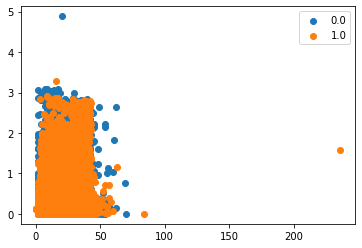

In [ ]:
from numpy import where
import matplotlib
import matplotlib.pyplot as pyplot

counter = Counter(y)


for label, _ in counter.items():
  print(_)
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  pyplot.legend()

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0.0: 193906, 1.0: 193906})


193906
193906


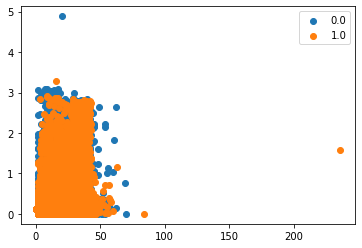

In [ ]:
counter_res = Counter(y_res)


for label, _ in counter_res.items():
  print(_)
  row_ix_res = where(y_res == label)[0]
  pyplot.scatter(X_res[row_ix_res, 0], X_res[row_ix_res, 1], label=str(label))
  pyplot.legend()

In [ ]:
print(X_res)
print("\n")
print(y_res)
print("\n")

balanced_values = (np.insert(X_res, X_res.shape[1], y_res, axis = 1))

balanced_dataset = pd.DataFrame(data=balanced_values, columns=imputed_dataset.columns)
balanced_dataset

[[8.00000000e+00 1.60580000e-02 1.16440000e-02 ... 0.00000000e+00
  9.00000000e-01 4.27701000e-01]
 [5.00000000e+00 6.31200000e-03 9.38600000e-03 ... 0.00000000e+00
  9.00000000e-01 4.27701000e-01]
 [3.00000000e+00 2.34220000e-02 1.30800000e-03 ... 0.00000000e+00
  9.00000000e-01 4.27701000e-01]
 ...
 [1.53050569e+01 1.09529942e-01 3.77925557e-02 ... 0.00000000e+00
  1.00000000e+00 3.29660161e-01]
 [1.67666102e+01 1.33316550e-01 1.43576701e-01 ... 0.00000000e+00
  3.85604706e-01 3.29660161e-01]
 [1.67666102e+01 1.33316550e-01 1.43576701e-01 ... 0.00000000e+00
  9.29800162e-01 3.29660161e-01]]


[0. 0. 0. ... 1. 1. 1.]




,location:num_valid_updates,location:log_latitude_range,location:log_longitude_range,location:min_altitude,location:max_altitude,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,audio_properties:max_abs_value,audio_properties:normalization_multiplier,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,CLASS
0,8.000000,0.016058,0.011644,107.327866,107.444542,65.000000,10.000000,2.046826,0.716290,0.000006,0.000005,-0.000006,-0.000001,0.000605,0.000738,-13.549097,1.401999,-0.704891,1.090211,-0.355878,-0.276246,-0.474989,-0.164379,-0.126404,-0.155411,-0.429673,-0.010401,-0.395080,3.794870,1.717074,1.386633,0.919153,0.781238,0.677766,0.636156,0.619780,0.463478,0.584551,0.416353,0.396484,0.333246,-0.010833,0.010853,0.0,0.900000,0.427701,0.0
1,5.000000,0.006312,0.009386,107.327866,107.838150,65.000000,10.000000,1.090911,0.087013,0.000610,0.000775,-0.000006,0.000009,0.008010,0.010214,-14.858507,2.634964,-0.333264,1.044149,-0.278071,-0.106829,-0.607542,-0.405368,-0.254425,-0.004343,-0.494752,-0.118831,-0.157087,3.105783,2.000479,1.225756,0.961195,0.549289,0.689458,0.660151,0.500852,0.503734,0.502756,0.457566,0.367323,0.381989,-0.007966,0.007986,0.0,0.900000,0.427701,0.0
2,3.000000,0.023422,0.001308,107.486160,107.545700,65.000000,10.000000,2.636773,0.969556,0.000636,0.000810,0.000024,-0.000001,0.010493,0.013289,-8.121591,2.289356,-0.082597,1.139277,-0.713073,-0.431688,-0.873148,-0.217033,-0.024974,-0.035368,-0.553310,-0.068898,-0.368726,2.462395,1.856324,1.532950,1.090916,0.679544,0.804691,0.695999,0.642575,0.628645,0.503185,0.389384,0.485069,0.397792,-1.035736,1.035767,0.0,0.900000,0.427701,0.0
3,3.000000,0.006010,0.013847,106.346588,107.545700,65.000000,10.823976,1.452658,0.373395,0.000619,0.000800,0.000006,-0.000014,0.004647,0.005985,-8.305555,2.563314,-0.373057,1.082110,-0.538777,-0.258276,-0.825694,-0.199237,-0.060454,-0.197026,-0.248424,0.020790,-0.816249,2.877096,1.742282,1.296602,0.946116,0.546904,0.748546,0.694885,0.576296,0.560920,0.487659,0.457883,0.490033,0.528575,-1.110900,1.110933,0.0,0.900000,0.427701,0.0
4,5.000000,0.080401,0.030949,105.760384,107.071968,65.000000,10.000000,9.310615,2.231155,0.000591,0.000770,-0.000052,-0.000030,0.008452,0.011012,-11.488435,2.294910,-0.751216,1.034768,-0.749439,-0.284983,-0.692220,-0.190684,-0.007380,-0.255322,-0.402399,0.152235,-0.519166,3.847504,1.736531,1.573501,1.018043,0.896453,0.756097,0.764625,0.704467,0.565882,0.476044,0.471686,0.426533,0.538912,-0.339769,0.339790,0.0,0.900000,0.461277,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387807,0.000000,0.133317,0.143577,201.791042,207.278998,22.299730,4.000000,0.000000,-6.907755,0.000094,0.000061,-0.000059,-0.000016,0.000389,0.000323,5.677308,-3.489088,-1.425010,-0.383987,-1.118191,-0.295920,-0.840931,-0.322446,-0.605509,-0.280976,-0.463392,-0.181319,-0.346562,1.202808,0.231130,0.212588,0.203468,0.213358,0.202866,0.206981,0.202063,0.196764,0.196388,0.186432,0.188041,0.179899,-6.681576,6.689584,0.

In [ ]:
# Store the dataset in CSV files
%cd "/content/drive/MyDrive/IOTDA Project"
balanced_dataset.to_csv('balanced_dataset.csv', index=False)
print("CSV Created")

/content/drive/MyDrive/IOTDA Project
CSV Created


So, let's split again the dataset:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size = validation_size, random_state = seed) # random_state = 7 because maybe better splitting data
print(X_train.shape)
print(Y_test.shape)

(271468, 46)
(116344,)


# Identification and comparison of the classification model
Loading of the dataset and than we split the original dataset into two parts (train and test) to evaluate the performance of a machine learning algorithm.

Standardization and Normalization of Dataset Befor training

In [ ]:
normalized = preprocessing.normalize(X_train)
normalized

array([[1.77656533e-01, 1.27053291e-03, 3.99904857e-04, ...,
        0.00000000e+00, 2.88691867e-03, 1.64858601e-03],
       [1.92046803e-01, 2.59872247e-04, 7.35780686e-04, ...,
        0.00000000e+00, 5.48705152e-03, 1.80886229e-03],
       [1.20602058e-02, 3.18389433e-06, 1.26149753e-05, ...,
        0.00000000e+00, 6.03010291e-03, 9.04515436e-08],
       ...,
       [6.83803319e-01, 3.11503972e-03, 2.90400750e-03, ...,
        0.00000000e+00, 3.94501915e-03, 2.56969605e-02],
       [6.82488172e-01, 2.54417941e-03, 2.12767053e-03, ...,
        0.00000000e+00, 2.72995269e-02, 4.09492903e-07],
       [7.23545957e-02, 7.68294491e-05, 4.56618722e-04, ...,
        0.00000000e+00, 2.28195263e-03, 1.83480213e-03]])

#Behaviour and testing of Classifiers

##LOGISTIC REGRESSION

In [35]:
def training_and_test(datas, results, names):
    print("### using " + datas.get("name") + " ###")
    grid = GridSearchCV(estimator=datas.get("model"), param_grid=datas.get("params"), scoring='accuracy', verbose = 3)
    grid_result = grid.fit(X_train, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    results.append(means)
    names.append(datas.get("name"))
    testX = preprocessing.normalize(X_test)
    predictions = grid.predict(testX)
    print("accuracy: ", accuracy_score(Y_test, predictions))
    print(classification_report(Y_test, predictions))

    return predictions, results, names

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

results = []
names = []


datas = {
    'name': 'LC',
    'model': LogisticRegression(),
    'params': {
       'penalty': ['l2'],
       'C':  [1.0, 3.0, 6.0, 7.0, 10.0],
       'solver': ['sag', 'saga']
    }}

predictionsLC, results, names = training_and_test(datas, results, names)

### using LC ###
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .....C=1.0, penalty=l2, solver=sag;, score=0.680 total time=  21.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .....C=1.0, penalty=l2, solver=sag;, score=0.659 total time=  19.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .....C=1.0, penalty=l2, solver=sag;, score=0.659 total time=  19.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .....C=1.0, penalty=l2, solver=sag;, score=0.657 total time=  19.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .....C=1.0, penalty=l2, solver=sag;, score=0.658 total time=  19.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=1.0, penalty=l2, solver=saga;, score=0.673 total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=1.0, penalty=l2, solver=saga;, score=0.652 total time=  21.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=1.0, penalty=l2, solver=saga;, score=0.650 total time=  22.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=1.0, penalty=l2, solver=saga;, score=0.651 total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ....C=1.0, penalty=l2, solver=saga;, score=0.649 total time=  21.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .....C=3.0, penalty=l2, solver=sag;, score=0.680 total time=  19.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .....C=3.0, penalty=l2, solver=sag;, score=0.659 total time=  20.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .....C=3.0, penalty=l2, solver=sag;, score=0.659 total time=  20.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .....C=3.0, penalty=l2, solver=sag;, score=0.657 total time=  19.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .....C=3.0, penalty=l2, solver=sag;, score=0.658 total time=  19.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=3.0, penalty=l2, solver=saga;, score=0.673 total time=  21.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=3.0, penalty=l2, solver=saga;, score=0.652 total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=3.0, penalty=l2, solver=saga;, score=0.650 total time=  22.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=3.0, penalty=l2, solver=saga;, score=0.651 total time=  22.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ....C=3.0, penalty=l2, solver=saga;, score=0.649 total time=  22.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .....C=6.0, penalty=l2, solver=sag;, score=0.680 total time=  20.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .....C=6.0, penalty=l2, solver=sag;, score=0.659 total time=  20.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .....C=6.0, penalty=l2, solver=sag;, score=0.659 total time=  20.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .....C=6.0, penalty=l2, solver=sag;, score=0.657 total time=  21.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .....C=6.0, penalty=l2, solver=sag;, score=0.658 total time=  20.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=6.0, penalty=l2, solver=saga;, score=0.673 total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=6.0, penalty=l2, solver=saga;, score=0.652 total time=  22.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=6.0, penalty=l2, solver=saga;, score=0.650 total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=6.0, penalty=l2, solver=saga;, score=0.651 total time=  22.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ....C=6.0, penalty=l2, solver=saga;, score=0.649 total time=  22.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END .....C=7.0, penalty=l2, solver=sag;, score=0.680 total time=  20.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END .....C=7.0, penalty=l2, solver=sag;, score=0.659 total time=  19.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END .....C=7.0, penalty=l2, solver=sag;, score=0.659 total time=  19.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END .....C=7.0, penalty=l2, solver=sag;, score=0.657 total time=  19.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END .....C=7.0, penalty=l2, solver=sag;, score=0.658 total time=  20.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=7.0, penalty=l2, solver=saga;, score=0.673 total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=7.0, penalty=l2, solver=saga;, score=0.652 total time=  22.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=7.0, penalty=l2, solver=saga;, score=0.650 total time=  21.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=7.0, penalty=l2, solver=saga;, score=0.651 total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ....C=7.0, penalty=l2, solver=saga;, score=0.649 total time=  22.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ....C=10.0, penalty=l2, solver=sag;, score=0.680 total time=  20.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ....C=10.0, penalty=l2, solver=sag;, score=0.659 total time=  19.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ....C=10.0, penalty=l2, solver=sag;, score=0.659 total time=  20.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ....C=10.0, penalty=l2, solver=sag;, score=0.657 total time=  20.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ....C=10.0, penalty=l2, solver=sag;, score=0.658 total time=  20.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END ...C=10.0, penalty=l2, solver=saga;, score=0.673 total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5] END ...C=10.0, penalty=l2, solver=saga;, score=0.652 total time=  22.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5] END ...C=10.0, penalty=l2, solver=saga;, score=0.650 total time=  22.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5] END ...C=10.0, penalty=l2, solver=saga;, score=0.651 total time=  21.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5] END ...C=10.0, penalty=l2, solver=saga;, score=0.649 total time=  22.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Best: 0.662793 using {'C': 3.0, 'penalty': 'l2', 'solver': 'sag'}
accuracy:  0.6394232158509685
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.68     58057
         1.0       0.60      0.56      0.58     45760

    accuracy                           0.64    103817
   macro avg       0.63      0.63      0.63    103817
weighted avg       0.64      0.64      0.64    103817



## GAUSSIAN NAIVE BAYES

In [42]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

results = []
names = []

datas = {
    'name': 'GaussianNB',
    'model': GaussianNB(),
    'params': {
             'var_smoothing' : np.logspace(0,-9, num=100) 
    }}
    

In [43]:
predictionsNB, results, names = training_and_test(datas, results, names)

### using GaussianNB ###
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.446 total time=   0.3s
[CV 2/5] END .................var_smoothing=1.0;, score=0.446 total time=   0.3s
[CV 3/5] END .................var_smoothing=1.0;, score=0.449 total time=   0.3s
[CV 4/5] END .................var_smoothing=1.0;, score=0.448 total time=   0.3s
[CV 5/5] END .................var_smoothing=1.0;, score=0.450 total time=   0.2s
[CV 1/5] END ..var_smoothing=0.8111308307896871;, score=0.445 total time=   0.2s
[CV 2/5] END ..var_smoothing=0.8111308307896871;, score=0.450 total time=   0.2s
[CV 3/5] END ..var_smoothing=0.8111308307896871;, score=0.453 total time=   0.2s
[CV 4/5] END ..var_smoothing=0.8111308307896871;, score=0.452 total time=   0.2s
[CV 5/5] END ..var_smoothing=0.8111308307896871;, score=0.450 total time=   0.2s
[CV 1/5] END ...var_smoothing=0.657933224657568;, score=0.450 total time=   0.2s
[CV 2/5] END ...var_s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


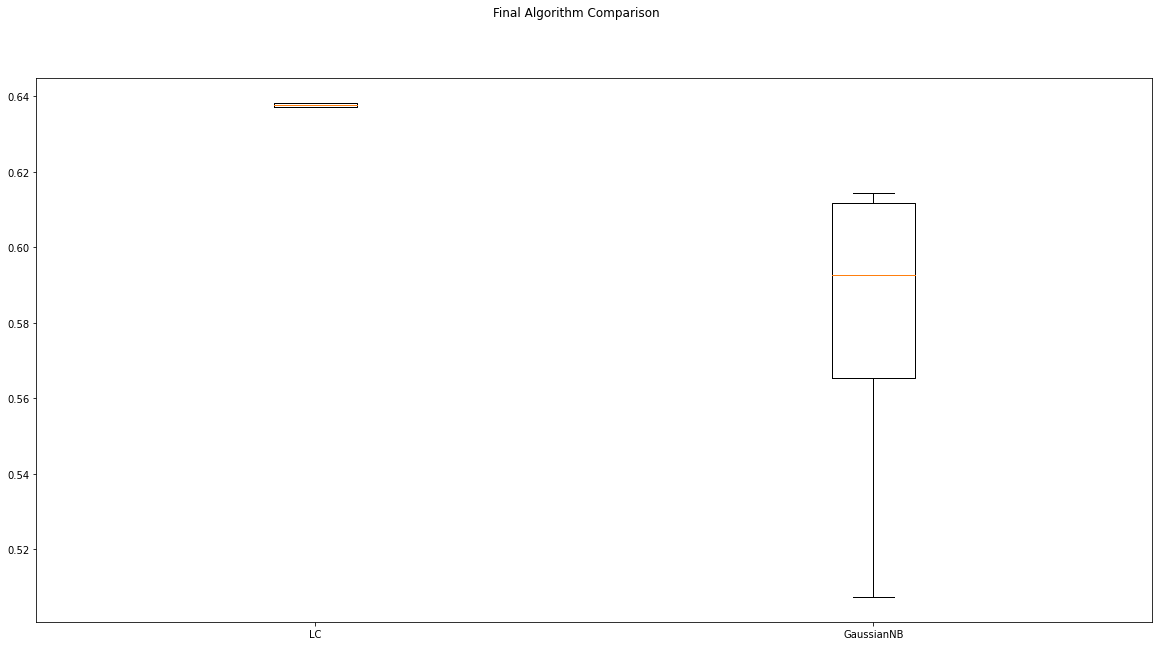

In [ ]:
import matplotlib.pyplot as pyplot

# Plot the results
fig = pyplot.figure(figsize=(20,10))
fig.suptitle('Final Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# CONFUSION MATRIX

['TN=20494', 'FP=37852', 'FN=10749', 'TP=47249']


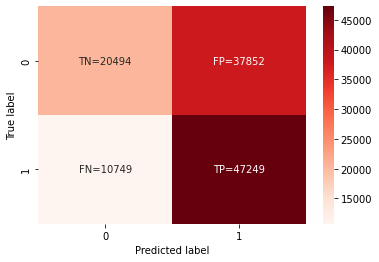

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(Y_test, predictionsLC)
tn, fp, fn, tp = cf_matrix.ravel()
labels = ['TN=%d'%tn,"FP=%d"%fp,"FN=%d"%fn,"TP=%d"%tp]
print(labels)
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')
pyplot.ylabel('True label')
pyplot.xlabel('Predicted label')
axis_labels = ['0', '1']
pyplot.xticks([0.5,1.5], axis_labels)
pyplot.yticks([0.5,1.5], axis_labels)
pyplot.show()